In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [8]:
# Load the train and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of each dataset to understand their structure
train_data.head(),test_data.head()


(    timestamp  value  is_anomaly  predicted
 0  1425008573     42       False  44.072500
 1  1425008873     41       False  50.709390
 2  1425009173     41       False  81.405120
 3  1425009473     61       False  39.950367
 4  1425009773     44       False  35.350160,
     timestamp  value  predicted
 0  1396332000   20.0       20.0
 1  1396332300   20.0       20.0
 2  1396332600   20.0       20.0
 3  1396332900   20.0       20.0
 4  1396333200   20.0       20.0)

In [9]:
print(f'Train Data Shape: {train_data.shape}')
print(f'Test Data Shape: {test_data.shape}')

train_data.describe(), test_data.describe()

train_data.isnull().sum(), test_data.isnull().sum()


Train Data Shape: (15830, 4)
Test Data Shape: (3960, 3)


(timestamp     0
 value         0
 is_anomaly    0
 predicted     0
 dtype: int64,
 timestamp    0
 value        0
 predicted    0
 dtype: int64)

In [10]:
# Fill missing values with the median of each column
train_data_cleaned = train_data.fillna(train_data.median())
test_data_cleaned = test_data.fillna(test_data.median())

# Verify that there are no missing values after cleaning
train_data_cleaned.isnull().sum(), test_data_cleaned.isnull().sum()


(timestamp     0
 value         0
 is_anomaly    0
 predicted     0
 dtype: int64,
 timestamp    0
 value        0
 predicted    0
 dtype: int64)

In [11]:
train_data_encoded = pd.get_dummies(train_data_cleaned)
test_data_encoded = pd.get_dummies(test_data_cleaned)

missing_cols = set(train_data_encoded.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0
test_data_encoded = test_data_encoded[train_data_encoded.columns]

# Display the first few rows of the encoded datasets
train_data_encoded.head(), test_data_encoded.head()

(    timestamp  value  is_anomaly  predicted
 0  1425008573     42       False  44.072500
 1  1425008873     41       False  50.709390
 2  1425009173     41       False  81.405120
 3  1425009473     61       False  39.950367
 4  1425009773     44       False  35.350160,
     timestamp  value  is_anomaly  predicted
 0  1396332000   20.0           0       20.0
 1  1396332300   20.0           0       20.0
 2  1396332600   20.0           0       20.0
 3  1396332900   20.0           0       20.0
 4  1396333200   20.0           0       20.0)

In [12]:
# Step 5: Anomaly Detection
# Use Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(train_data_encoded)

# Predict anomalies in train and test data
train_anomalies = iso_forest.predict(train_data_encoded)
test_anomalies = iso_forest.predict(test_data_encoded)

# Add the anomaly labels to the datasets
train_data_encoded['Anomaly'] = train_anomalies
test_data_encoded['Anomaly'] = test_anomalies

# Count the number of anomalies in each dataset
train_data_encoded['Anomaly'].value_counts(), test_data_encoded['Anomaly'].value_counts()


(Anomaly
  1    15671
 -1      159
 Name: count, dtype: int64,
 Anomaly
 1    3960
 Name: count, dtype: int64)

<Figure size 1200x600 with 0 Axes>

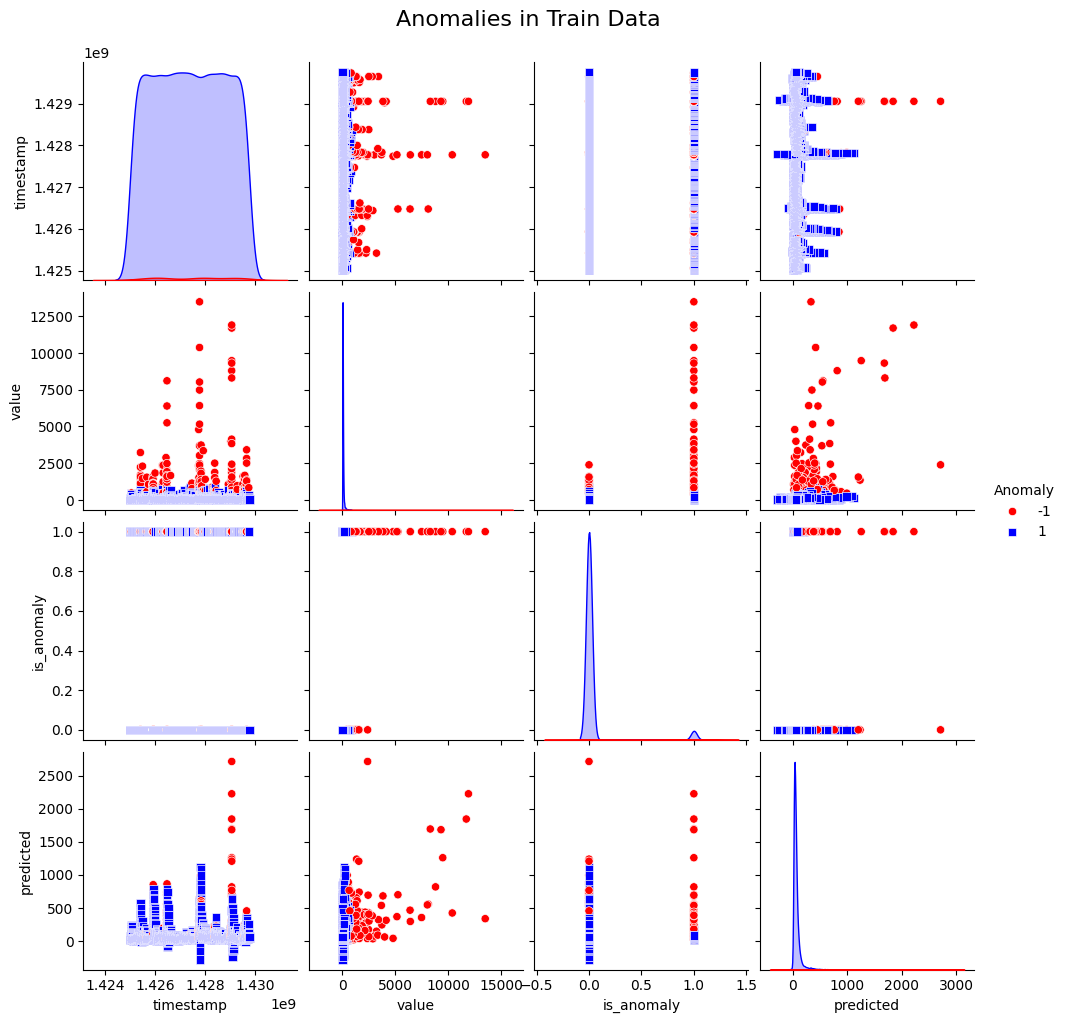

c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\Lokesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: The

<Figure size 1200x600 with 0 Axes>

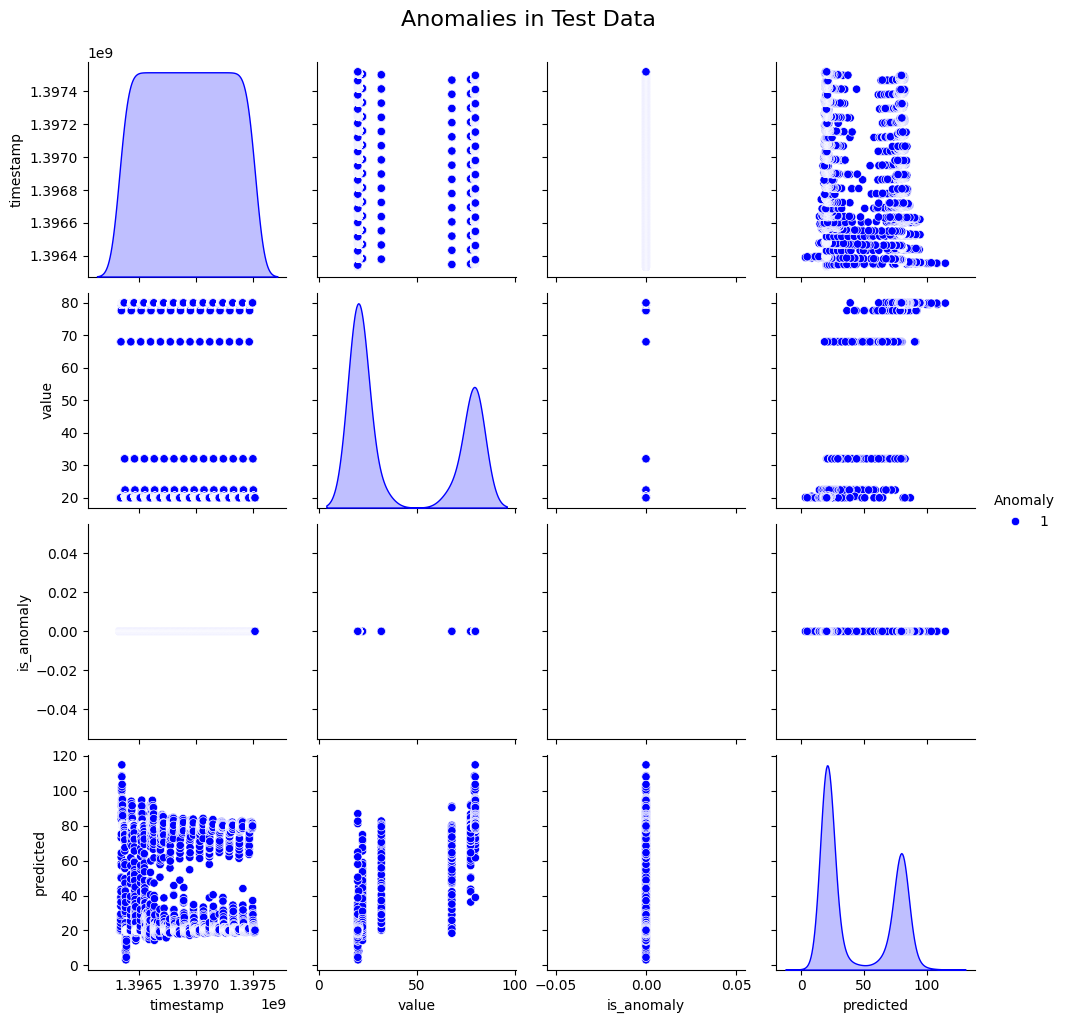

In [21]:
# Visualization: Pair Plot of numerical features with anomalies
def plot_anomalies(data, title):
    plt.figure(figsize=(12, 6))
    sns.pairplot(data, hue='Anomaly', palette={1: 'blue', -1: 'red'}, markers=["o", "s"])
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

# Plot anomalies in train data
plot_anomalies(train_data_encoded, 'Anomalies in Train Data')

# Plot anomalies in test data
plot_anomalies(test_data_encoded, 'Anomalies in Test Data')
